By using pandas and numpy

In [15]:
import numpy as np
import pandas as pd

np.random.seed(23) 

# Generate samples for class 1
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

# Generate samples for class 2
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

# Concatenate the two datasets
df = pd.concat([df, df1], ignore_index=True)

# Shuffle the combined dataset
df = df.sample(40)

# Display the result
df.head()


,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [18]:
import plotly.express as px

fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3', color=df['target'].astype('str'))

# Customize markers
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Show the plot (this should open in your browser)
fig.write_html("scatter_3d_plot.html")


In [11]:
import nbformat
print(nbformat.__version__)


5.10.4


In [19]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [20]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [21]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [22]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [23]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

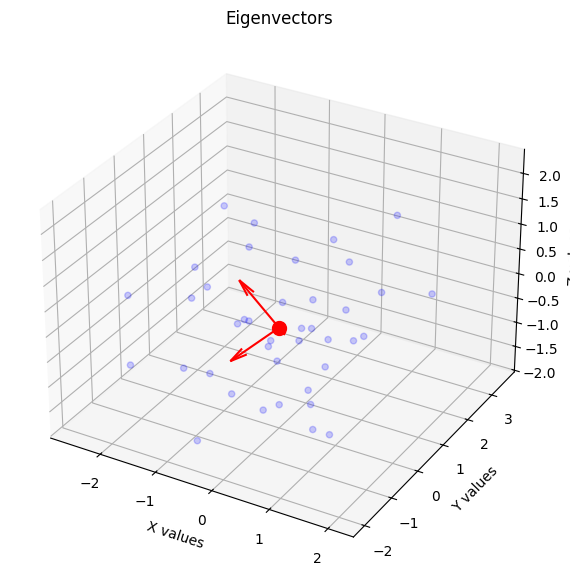

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data (replace with your actual df)
# Ensure that df has 'feature1', 'feature2', 'feature3' columns
data = df[['feature1', 'feature2', 'feature3']].values

# Calculate the covariance matrix
cov_matrix = np.cov(data.T)

# Compute the eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Create the plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], c='blue', marker='o', alpha=0.2)

# Plot the mean point (red)
ax.scatter(df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean(), c='red', marker='o', s=100)

# Add the eigenvectors as arrows
mean_x = df['feature1'].mean()
mean_y = df['feature2'].mean()
mean_z = df['feature3'].mean()

for v in eigen_vectors.T:
    ax.quiver(mean_x, mean_y, mean_z, v[0], v[1], v[2], color="r", length=1.0, normalize=True)

# Set labels
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Z values')

# Title
plt.title('Eigenvectors')

# Show the plot
plt.show()


In [27]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [28]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [31]:
import plotly.express as px

# Ensure 'target' is of type string
new_df['target'] = new_df['target'].astype('str')

# Create the scatter plot
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

# Customize marker appearance
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Display the plot
fig.write_html('scatter.html')
